In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import numpy as np

### Load and explore the dataset

In [19]:

# Load the dataset
df = pd.read_csv ('data/heart.csv')

# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
# First few rows of the dataset for initial exploration
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Summary statistics for numerical columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check for missing values

In [22]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset does not contain any missing values

### Check if there are duplicate values

In [23]:
df.duplicated().sum()

1

### Define features and target and split the dataset into training and testing sets

In [24]:
# Defining the features
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Normalise numerical features

In [25]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Training the model using Random Forest Classifer

In [26]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

### Evaluating the model

In [36]:
accuracy = accuracy_score(y_test, y_pred)

accuracy



0.8360655737704918

The model correctly predicted outcomes for 83.6% of the test cases.

### Save the model for deployment

In [33]:

# Save the model and scaler
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


### Analysing the feature importance that contribute most to the predictions.

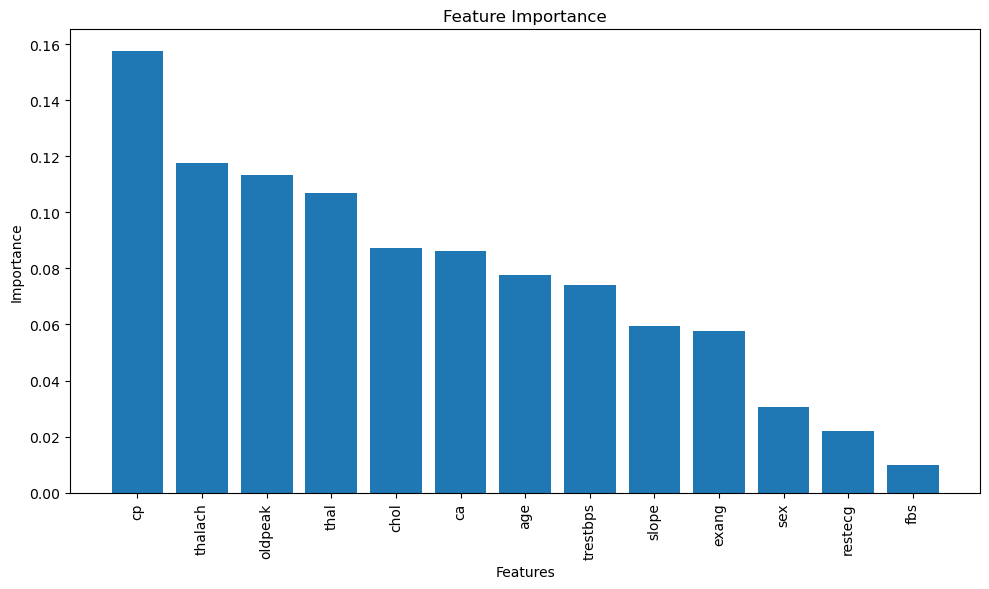

[('cp', 0.15739173079046803),
 ('thalach', 0.11749102165787942),
 ('oldpeak', 0.11339892054219698),
 ('thal', 0.10706190764739959),
 ('chol', 0.08713060707926566)]

In [32]:
# Analyzing feature importance



# Get feature importances from the Random Forest model
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# List top 5 important features
top_features = [(feature_names[i], feature_importances[i]) for i in sorted_indices[:5]]
top_features


The chart above shows the top contributing features:

Chest Pain Type (cp): This has the highest importance, indicating that variations in chest pain type play a crucial role in determining the likelihood of heart disease.

Maximum Heart Rate Achieved (thalach): A high or abnormal maximum heart rate is a critical indicator.


ST Depression (oldpeak): This measures exercise-induced changes in the ECG and is a strong predictor of cardiac issues.

Thalassemia (thal) and Cholesterol Level (chol): These factors significantly contribute to the prediction but are slightly less impactful than the top features.

Age: Age shows moderate importance, highlighting that older individuals may have a higher likelihood of heart disease.

Fasting Blood Sugar (fbs): This has the least importance, suggesting that fasting blood sugar is less predictive for heart disease compared to other features.

Sex and Resting ECG Results (restecg): These have lower contributions but still provide some predictive value.